### **part 1.Data wrangling**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the correct dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)


# Display the first few rows and basic info
print("--- Data Head ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

# Check for missing values
print("\n--- Missing Values ---")
print(df.isna().sum())

--- Data Head ---
         Date       Time State    Group  Unit  Sales
0  1-Oct-2020    Morning    WA     Kids     8  20000
1  1-Oct-2020    Morning    WA      Men     8  20000
2  1-Oct-2020    Morning    WA    Women     4  10000
3  1-Oct-2020    Morning    WA  Seniors    15  37500
4  1-Oct-2020  Afternoon    WA     Kids     3   7500

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB

--- Missing Values ---
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


**Observation:** The `Date` column is currently an object and needs to be converted to a datetime format for time-series analysis. The data is otherwise clean with no missing values.


**1.2 Cleaning and Preparing the Data**
The primary cleaning task is to convert the `Date` column to a proper datetime object.

In [17]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Confirm the data type has changed
print("--- Corrected Date Info ---")
print(df['Date'].head())

--- Corrected Date Info ---
0   2020-10-01
1   2020-10-01
2   2020-10-01
3   2020-10-01
4   2020-10-01
Name: Date, dtype: datetime64[ns]


#### **Part 2: Data Analysis**
In this section, we perform descriptive and statistical analysis on the cleaned data.


#### **2.1 Descriptive Statistical Analysis**
Here, we calculate the mean, median, mode, and standard deviation for the `Sales` and `Unit` columns as specified in the project brief.

In [18]:
# Calculate descriptive statistics
print("--- Descriptive Statistics for Sales and Unit Columns ---")
print(df[['Sales', 'Unit']].describe())

# Calculate the mode
print("\n--- Mode for Sales and Unit Columns ---")
print(df[['Sales', 'Unit']].mode())

--- Descriptive Statistics for Sales and Unit Columns ---
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000

--- Mode for Sales and Unit Columns ---
   Sales  Unit
0  22500     9


#### **2.2 Group-Wise Sales Performance**
Recommendation: The GroupBy() function is essential for this analysis. It should be used to segment sales by state and demographic to create targeted marketing strategies. This powerful function allows us to aggregate data and compare performance across different customer segments easily.

In [19]:
# Identify highest and lowest sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("\n--- Total Sales by State ---")
print(state_sales)

# Identify highest and lowest sales by Demographic Group
demographic_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print("\n--- Total Sales by Demographic Group ---")
print(demographic_sales)


# Group by 'State' and 'Group' to find the highest and lowest sales
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
highest_sales = state_group_sales[state_group_sales['Sales'] == state_group_sales['Sales'].max()]
lowest_sales = state_group_sales[state_group_sales['Sales'] == state_group_sales['Sales'].min()]
print("\n--- Highest Sales by State and Group ---")
print(highest_sales)
print("\n--- Lowest Sales by State and Group ---")
print(lowest_sales) 




--- Total Sales by State ---
State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

--- Total Sales by Demographic Group ---
Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

--- Highest Sales by State and Group ---
   State  Group     Sales
23   VIC  Women  26482500

--- Lowest Sales by State and Group ---
   State  Group    Sales
27    WA  Women  5262500


#### **Part 3: Data Visualization Dashboard**

This section provides key visualizations for the sales and marketing dashboard, using Seaborn as the preferred library.

**3.1 Statistical Visualizations**
We use a box plot for visualizing descriptive statistics [cite: 130] [cite\_start]and a distribution plot for sales data.

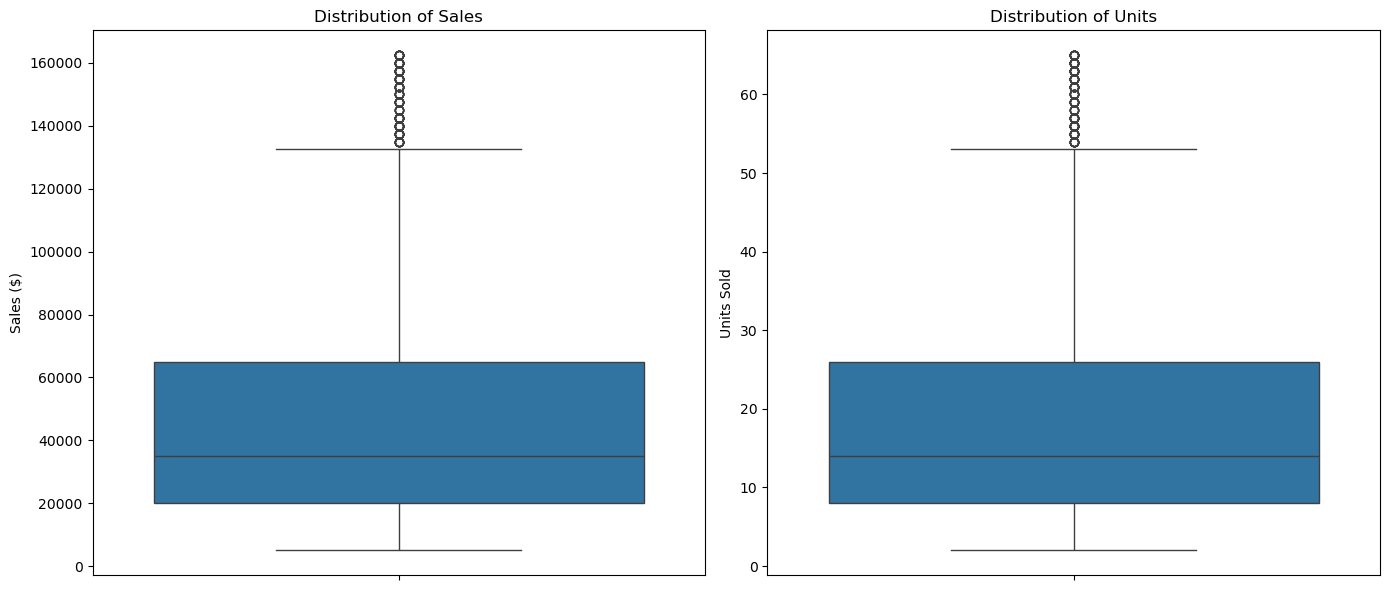

In [20]:
# Create two separate subplots since scaling is different (one for Sales, one for Unit)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Sales on the first subplot
sns.boxplot(data=df, y='Sales', ax=axes[0])
axes[0].set_title('Distribution of Sales')
axes[0].set_ylabel('Sales ($)')

# Plot Unit on the second subplot
sns.boxplot(data=df, y='Unit', ax=axes[1])
axes[1].set_title('Distribution of Units')
axes[1].set_ylabel('Units Sold')

plt.tight_layout()
plt.show()

**3.2 Business Performance Visualizations**

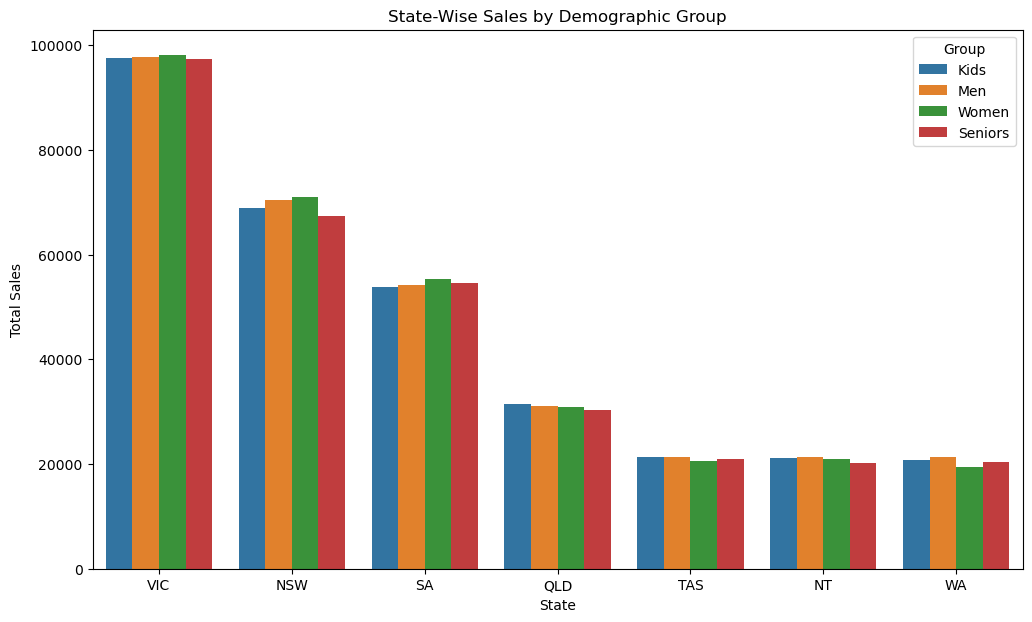

In [22]:

# State-wise sales by demographic group

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='State', y='Sales', hue='Group', errorbar=None, order=state_sales.index)
plt.title('State-Wise Sales by Demographic Group')
plt.ylabel('Total Sales')
plt.show()




     Group State  Sales
0     Kids    WA  20000
1      Men    WA  20000
2    Women    WA  10000
3  Seniors    WA  37500
4     Kids    WA   7500
Group    object
State    object
Sales     int64
dtype: object
array(['Kids', 'Men', 'Women', 'Seniors'], dtype=object)
array(['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS'], dtype=object)


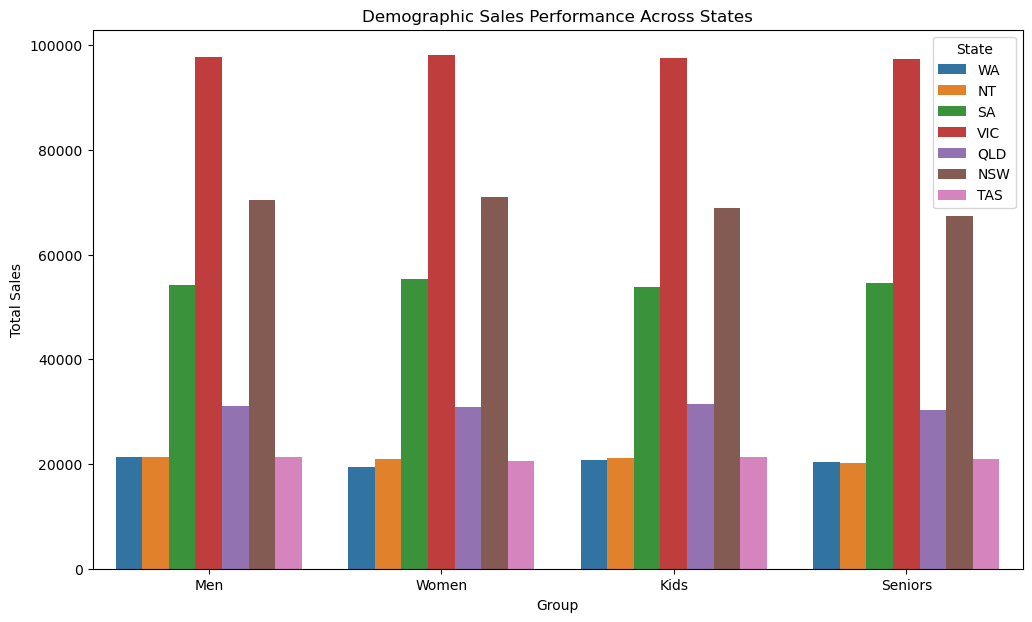

In [ ]:

# Demographic group sales across states
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Group', y='Sales', hue='State', errorbar=None, order=['Men', 'Women', 'Kids', 'Seniors'])
plt.title('Demographic Sales Performance Across States')
plt.ylabel('Total Sales')
plt.show()

**3.3 Time-Series and Time-of-Day Visualizations**
Here we visualize the daily and weekly sales trends and perform the required time-of-day analysis to find peak sales hours.


--- Quarterly Sales ---
Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

--- Monthly Sales (Q4) ---
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64


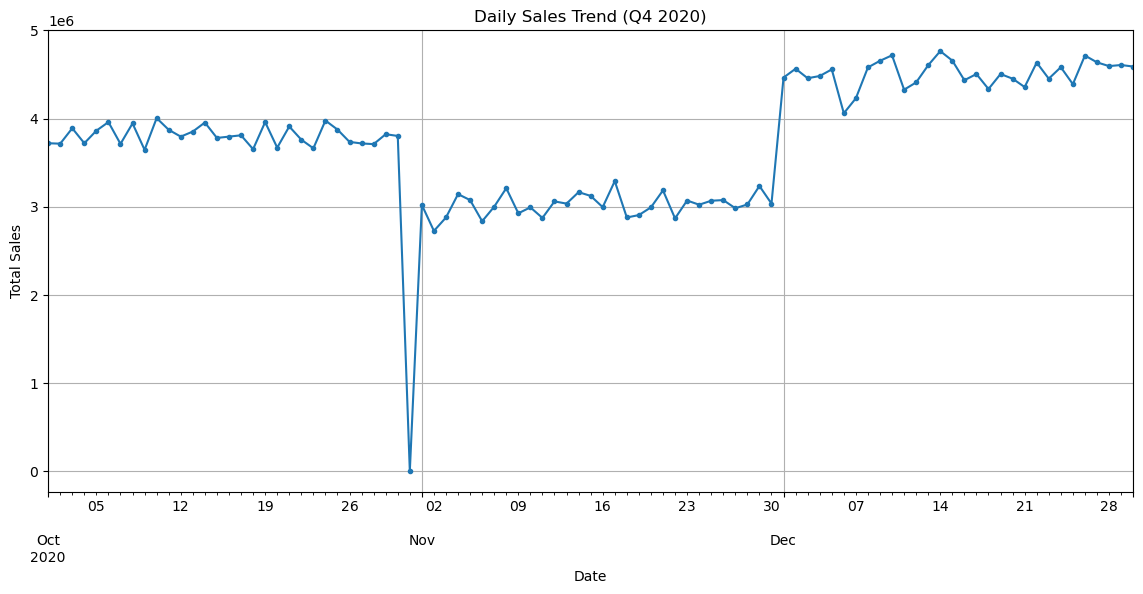

In [29]:

# Set 'Date' as the index for time-based resampling
df['Date'] = pd.to_datetime(df['Date'])        # Convert to datetime
df_time = df.set_index('Date')                 # Set as index

# Generate reports
daily_report = df_time.resample('D')['Sales'].sum()
weekly_report = df_time.resample('W')['Sales'].sum()
monthly_report = df_time.resample('ME')['Sales'].sum()
quarterly_report = df_time.resample('QE')['Sales'].sum()

print("\n--- Quarterly Sales ---")
print(quarterly_report)
print("\n--- Monthly Sales (Q4) ---")
print(monthly_report)


# Daily Sales Trend Chart
plt.figure(figsize=(14, 6))
daily_report.plot(kind='line', marker='.', linestyle='-')
plt.title('Daily Sales Trend (Q4 2020)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



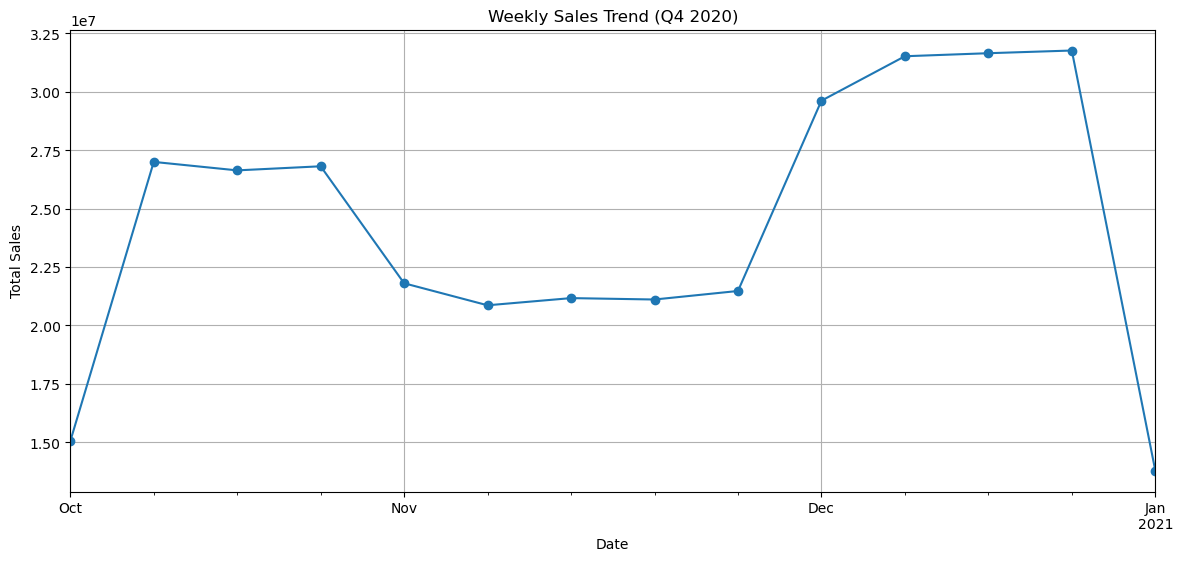

In [30]:
# Weekly Sales Trend Chart
plt.figure(figsize=(14, 6))
weekly_report.plot(kind='line', marker='o', linestyle='-')
plt.title('Weekly Sales Trend (Q4 2020)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



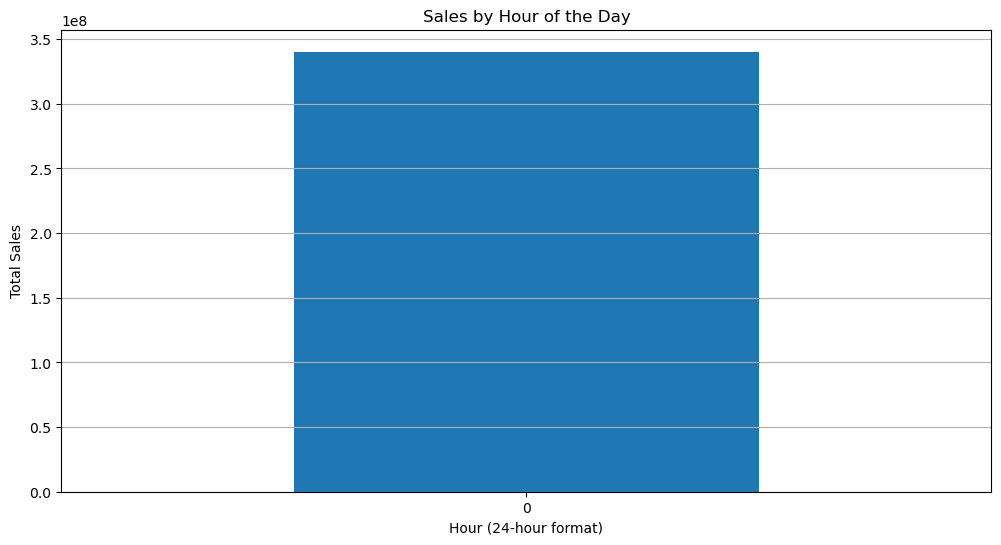

In [31]:
# Time-of-the-day analysis
df['Hour'] = df['Date'].dt.hour
sales_by_hour = df.groupby('Hour')['Sales'].sum()

plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

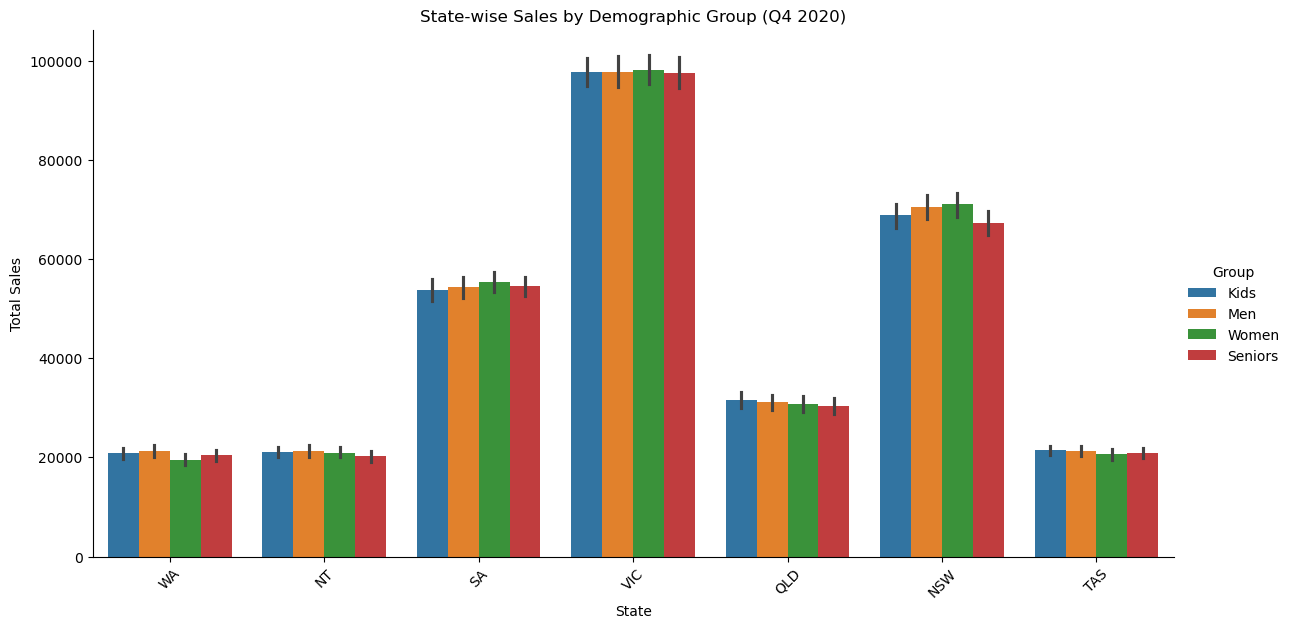

In [32]:
# State-wise sales by demographic group
plt.figure(figsize=(12, 6))
sns.catplot(x='State', y='Sales', hue='Group', kind='bar', data=df, height=6, aspect=2)
plt.title('State-wise Sales by Demographic Group (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

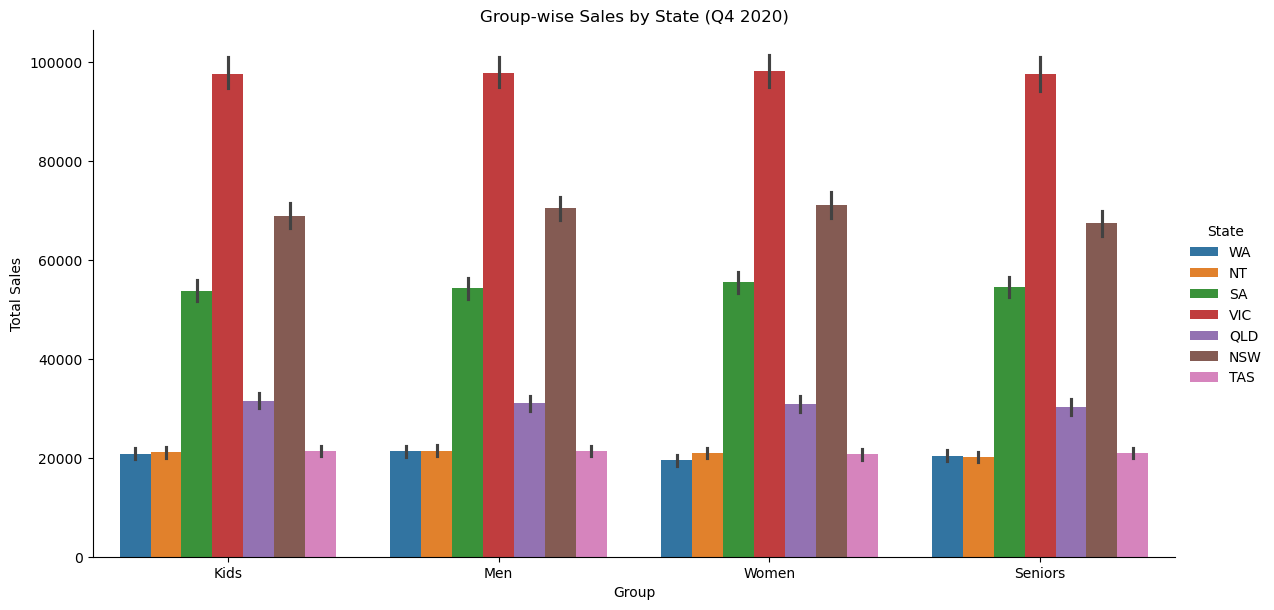

In [33]:
# Group-wise sales by state
plt.figure(figsize=(12, 6))
sns.catplot(x='Group', y='Sales', hue='State', kind='bar', data=df, height=6, aspect=2)
plt.title('Group-wise Sales by State (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()





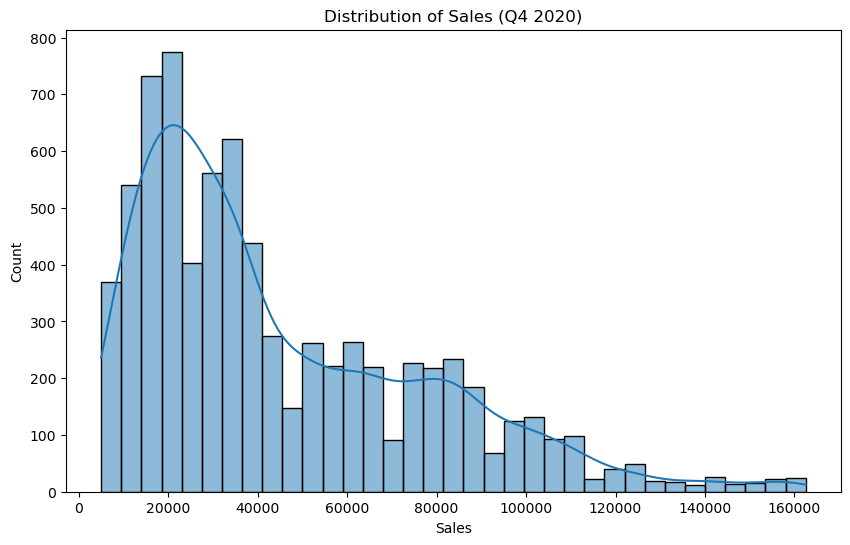

In [34]:
# Seaborn distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales (Q4 2020)')
plt.xlabel('Sales')
plt.show()



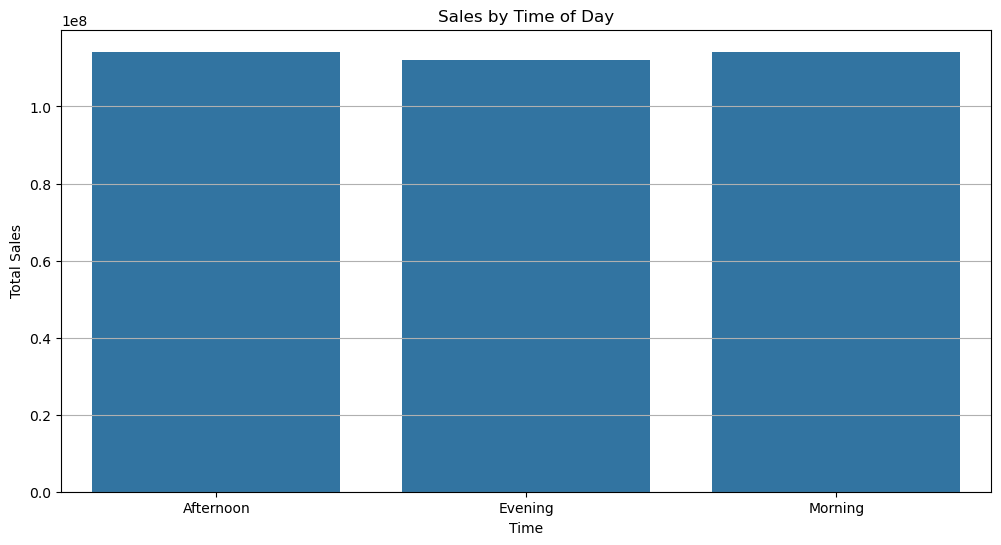

In [35]:
# Corrected time-of-day analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Sales', data=df.groupby('Time')['Sales'].sum().reset_index())
plt.title('Sales by Time of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



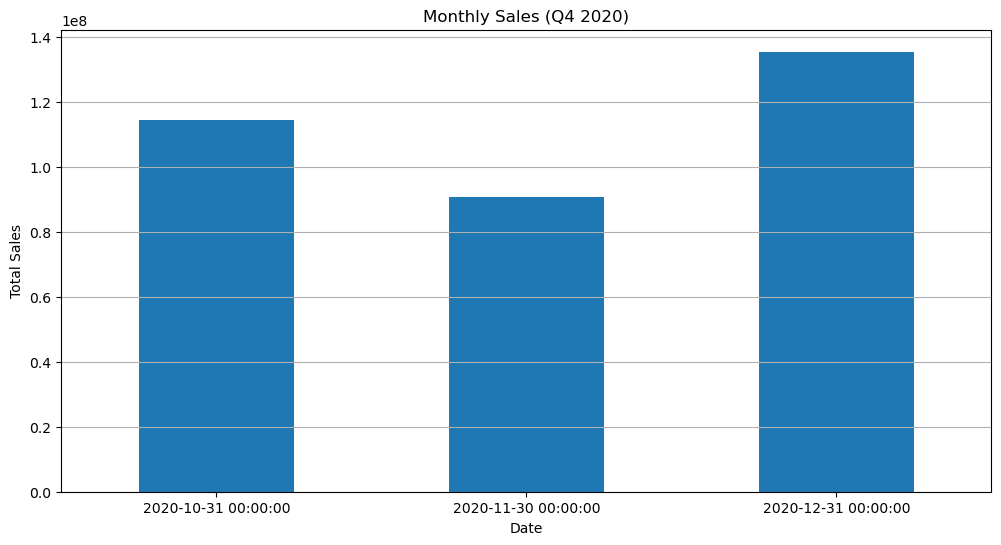

In [40]:
# Monthly and Quarterly Sales Charts
monthly_report = df_time.resample('ME')['Sales'].sum()
quarterly_report = df_time.resample('QE')['Sales'].sum()

# Monthly Sales Chart
plt.figure(figsize=(12, 6))
monthly_report.plot(kind='bar')
plt.title('Monthly Sales (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



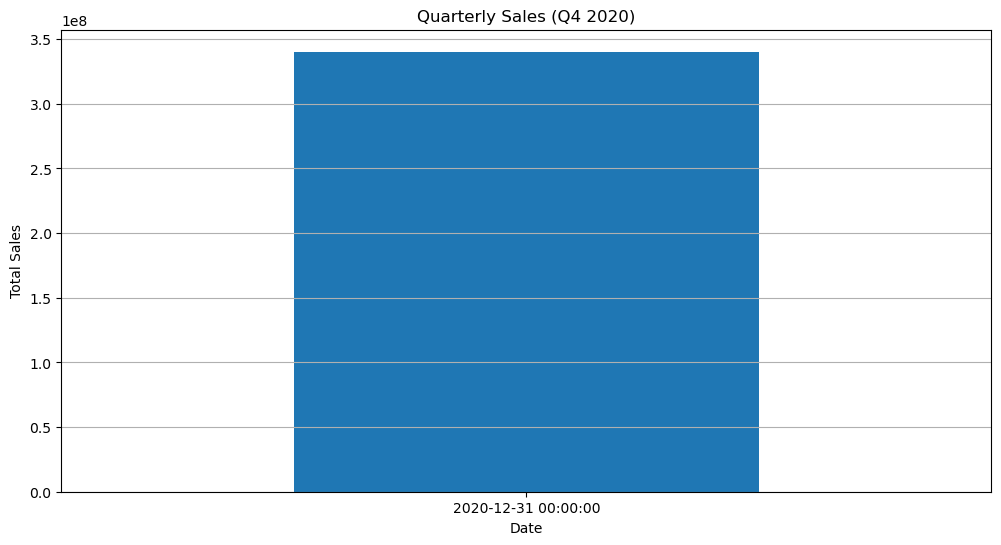

In [39]:
# Quarterly Sales Chart
plt.figure(figsize=(12, 6))
quarterly_report.plot(kind='bar')
plt.title('Quarterly Sales (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#### **Part 4: Data Normalization**

As a final step, we perform data normalization. [cite\_start]This technique is useful for machine learning applications but is done after the primary business analysis to maintain the interpretability of the results.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy to keep the original values
df_normalized = df.copy()
numeric_cols = ['Sales', 'Unit']
scaler = MinMaxScaler()

df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n--- Sample of Normalized Data (for ML applications) ---")
print(df_normalized[['Sales', 'Unit']].head())


--- Sample of Normalized Data (for ML applications) ---
      Sales      Unit
0  0.095238  0.095238
1  0.095238  0.095238
2  0.031746  0.031746
3  0.206349  0.206349
4  0.015873  0.015873
